<a href="https://colab.research.google.com/github/DaveLoay/AP_TAREA_1/blob/main/AP_T1_EX3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# NN
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

# Importando Datos

In [ ]:
# data
URL = 'https://raw.githubusercontent.com/gibranfp/CursoAprendizajeProfundo/2023-1/data/califs/califs.csv'
data_dir = '../data'
filepath = os.path.join(data_dir, 'califs.csv')

def set_seed(seed=0):
    """Initializes pseudo-random number generators."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

# Datos

In [ ]:
! mkdir {data_dir}
! wget -nc {URL} -O {filepath}

mkdir: cannot create directory ‘../data’: File exists
File ‘../data/califs.csv’ already there; not retrieving.


In [ ]:
df = pd.read_csv(filepath)
print('Shape:', df.shape)
df.head(5)

Shape: (50, 3)


,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


# Graficando datos

<Figure size 432x288 with 0 Axes>

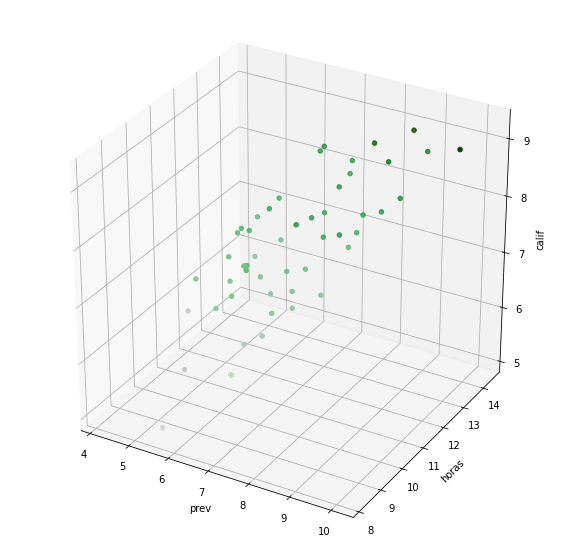

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')


x_axis = df['prev']
y_axis = df['horas']
z_axis = df['calif']
# ax.plot3D(x_axis,y_axis,z_axis, 'gray')

ax.scatter(x_axis, y_axis, z_axis, c=z_axis, cmap='viridis', linewidth=0.5);


ax.set_xlabel('prev')
ax.set_ylabel('horas')
ax.set_zlabel('calif')
ax.scatter3D(x_axis,y_axis,z_axis, c=z_axis, cmap='Greens')

# Preparando Datos

In [ ]:
x_ent = np.array(df.iloc[:,:2], dtype="float32")
y_ent = np.array(df.iloc[:,-1], dtype="float32")[..., np.newaxis]

x_ent = torch.tensor(x_ent)
y_ent = torch.tensor(y_ent)

print(x_ent.shape)
print(y_ent.shape)

torch.Size([50, 2])
torch.Size([50, 1])


In [ ]:
x_ent[1]

tensor([6.7000, 9.3000])

# DataSet

In [ ]:
ds = TensorDataset(x_ent,y_ent)
ds[0]

(tensor([5.6000, 8.2000]), tensor([5.1000]))

# DataLoader

In [ ]:
dl = DataLoader(ds,batch_size = 16, shuffle = True)

# Iterando sobre el Dataset
x, y = next(iter(dl))

print(f"x batch shape: {x.size()}")
print(f"y batch shape: {y.size()}")

x_pr = x[0]
y_pr = y[0]

print(x_pr)
print(y_pr)

x batch shape: torch.Size([16, 2])
y batch shape: torch.Size([16, 1])
tensor([ 5.9000, 11.3000])
tensor([7.])


# Revisando el dispositivo sobre el cual se trabaja

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# Definiendo Arquitectura con interfaz de alto nivel 

In [ ]:
from torch.nn.modules.linear import Linear
model = nn.Sequential(
    nn.Linear(2,2),
    nn.Linear(2,1),
)

model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)

# Definimos el optimizador

In [ ]:
learning_rate = 0.0035
batch_size = 64
epochs = 5

loss_fn = nn.MSELoss() # Definimosla función de costo, MSE para regresión
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)    # Definimos el optimizador


In [ ]:
# Loop de entrenamiento
def train_loop(dataloader, model,loss_fn,optimizer, epochs = 5):
  
  size = len(dataloader.dataset)
  loss_hist, loss_hist2 = [], []

  for epoch in range(epochs):
      for batch, (x,y) in enumerate(dataloader):
        # Calculando la predicción y la pérdida
        pred = model(x)
        loss = loss_fn(pred, y)
        acc = (y == pred).type(torch.float32).mean()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Guardando el historial de pérdida
        loss_hist.append(loss.item() * 100)
        # acc_hist.append(acc.item() * 100)
      
      #Imprimiendo la pérdida de la época
      loss = np.mean(loss_hist)
      loss_hist2.append(loss) 
      # acc = np.mean(acc_hist)
      # print(f'E{epoch:02} loss[{loss:6.2f}] acc=[{acc:5.2f}] ')
      print(f'E{epoch:02} loss[{loss:6.2f}]')
  
  return loss_hist2

In [ ]:
size = len(dl.dataset)
size

50

In [ ]:
loss1 = train_loop(dl,model,loss_fn,optimizer,epochs = 500)

E00 loss[2575.00]
E01 loss[1301.83]
E02 loss[878.13]
E03 loss[663.57]
E04 loss[535.74]
E05 loss[449.18]
E06 loss[391.47]
E07 loss[345.64]
E08 loss[310.24]
E09 loss[281.49]
E10 loss[257.77]
E11 loss[237.81]
E12 loss[221.42]
E13 loss[206.91]
E14 loss[194.96]
E15 loss[183.82]
E16 loss[174.36]
E17 loss[166.25]
E18 loss[158.70]
E19 loss[152.12]
E20 loss[147.64]
E21 loss[141.61]
E22 loss[136.70]
E23 loss[131.92]
E24 loss[127.94]
E25 loss[124.39]
E26 loss[120.38]
E27 loss[116.84]
E28 loss[113.78]
E29 loss[110.76]
E30 loss[108.38]
E31 loss[105.77]
E32 loss[103.55]
E33 loss[101.09]
E34 loss[ 99.11]
E35 loss[ 97.14]
E36 loss[ 95.14]
E37 loss[ 93.08]
E38 loss[ 91.16]
E39 loss[ 89.27]
E40 loss[ 87.63]
E41 loss[ 86.53]
E42 loss[ 85.04]
E43 loss[ 83.85]
E44 loss[ 82.65]
E45 loss[ 81.38]
E46 loss[ 80.17]
E47 loss[ 78.86]
E48 loss[ 77.75]
E49 loss[ 76.80]
E50 loss[ 76.00]
E51 loss[ 75.04]
E52 loss[ 74.41]
E53 loss[ 73.61]
E54 loss[ 72.94]
E55 loss[ 72.19]
E56 loss[ 71.29]
E57 loss[ 70.85]
E58 loss[ 69

# Graficando la pérdida

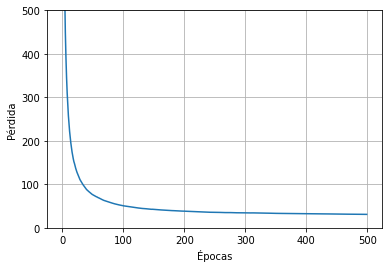

In [ ]:
plt.plot(loss1)
plt.ylim([0,500])
plt.grid()
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.show()

# Realizando la inferencia

In [ ]:
# Función para realizar predicciones
def predict(model,input):
  model.eval()
  with torch.no_grad():
    predicted = model(input)

    return predicted


In [ ]:
input = torch.tensor([3.0,12.0])  # Datos de prueba
pred = predict(model, input)
print('La calificación predicha es:', pred.numpy())

La calificación predicha es: [6.9581137]


# Discusión acerca del modelo

Dado que se solicito un modelo de regresión lineal, los hiperparámetros que se modificaron fueron la tasa de aprendizaje y el número de épocas de entrenamiento para el modelo.

En términos de la tasa de aprendizaje, mediante métodos eurísticos se llegó al valor de $0.0035$, debido a que se observó que era el valor más alto que permitía que el error continuara disminuyendo.

Aunado a lo anterior, dado que ya se contaba con una tasa de aprendizaje definida, lo siguinte era contemplar un número adecuado de épocas de entrenamiento. Por lo tanto, a juicio del diseñador se concluyo que $500$ épocas eran adecuadas. Esto debido a que eran las suficientes para que el error disminuyera a un valor considerable y, además, en caso de ampliar el número de épocas, la disminución del error era casi ínfima. 